### **Bibliotecas Necessárias**

In [2]:
import numpy as np
from ortools.linear_solver import pywraplp
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


### **Definições Globais**

In [3]:
StatusDict =   {
                    pywraplp.Solver.OPTIMAL: 'Optimal',
                    pywraplp.Solver.FEASIBLE: 'Feasible',
                    pywraplp.Solver.INFEASIBLE: 'Infeasible',
                    pywraplp.Solver.UNBOUNDED: 'Unbounded',
                    pywraplp.Solver.ABNORMAL: 'Abnormal',
                    pywraplp.Solver.NOT_SOLVED: 'Not solved'
               }

### **Instancia o GLOP(Google Linear Optimization Package) solver**

In [4]:
solver = pywraplp.Solver (
                            "ProblemaReceita",
                            pywraplp.Solver.GLOP_LINEAR_PROGRAMMING
                         )


### **Crie as duas variáveis ​​e deixe-as assumir qualquer valor não negativo.**

In [5]:
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(0, solver.infinity(), 'x2')


### **Definição das Restrições**

In [6]:
solver.Add(2 * x1 + 5 * x2 <= 30.0)
solver.Add(4 * x1 + 2 * x2 <= 20.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x76a19ad49ad0> >

### **Definição da Função Objetivo**

In [7]:
solver.Maximize(3 * x1 + 4 * x2)


### **Checa se Existe Solução**

In [8]:
solver.SetNumThreads(10)
solver.set_time_limit(60*1000) # 1 Minuto

status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print ( "#"*72) 
    print ( "# Resultado Obtido para as Variáveis do Problema ")   
    print ( "#"*72) 
    print ( "# Objetivo .: ", solver.Objective().Value())
    print ( "# x1 .......: ", x1.solution_value())
    print ( "# x2 .......: ", x2.solution_value())
    print ( "#"*72)
    
    print ()
    print ( "#"*72)
    print ( "# Resumo Operacional ") 
    print ( "#"*72)    

    print (f"# Versão do Solver .......: {solver.SolverVersion()}")
    print (f"# Número de Variáveis ....: {solver.NumVariables()}")
    print (f"# Número de Restrições ...: {solver.NumConstraints()}")
    print ( "# Gasto de Tempo .........:", solver.wall_time(), "Milissegundo ")
    print ( "# Intereções Necessárias .:", solver.iterations(), "Intereções")
    print ( "#"*72)    
else:
    print ( "#"*72) 
    print('O problema não tem uma solução ótima.')
    print ( "#"*72) 

########################################################################
# Resultado Obtido para as Variáveis do Problema 
########################################################################
# Objetivo .:  27.5
# x1 .......:  2.4999999999999996
# x2 .......:  5.0
########################################################################

########################################################################
# Resumo Operacional 
########################################################################
# Versão do Solver .......: Glop solver v9.10.4067
# Número de Variáveis ....: 2
# Número de Restrições ...: 2
# Gasto de Tempo .........: 70 Milissegundo 
# Intereções Necessárias .: 2 Intereções
########################################################################


### **Visão Gráfica da Solução**

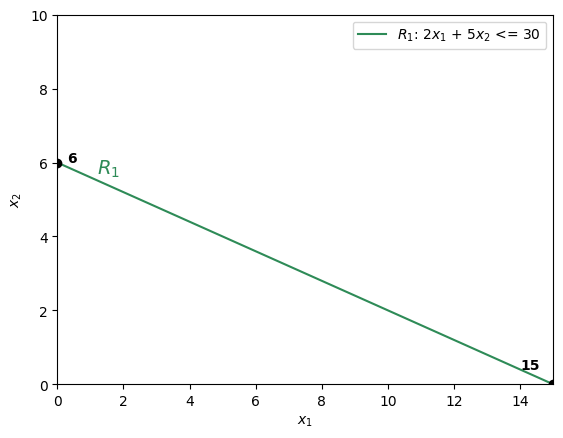

In [9]:
fig, ax = plt.subplots()

ax.set_xlim(0,15)
ax.set_ylim(0,10)
x1 = np.linspace(0, 15)

ax.plot(x1, 6-0.4*x1, label="$R_1$: 2$x_1$ + 5$x_2$ <= 30", color="seagreen")
ax.text(1.2, 5.7, '$R_1$', fontsize = 14, color="seagreen", fontweight="bold")

ax.plot(15, 0, "o", color="black")
ax.text(14, 0.4, '15', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 6, "o", color="black")
ax.text(0.3, 6, '6', fontsize = 10, color="black", fontweight="bold")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()

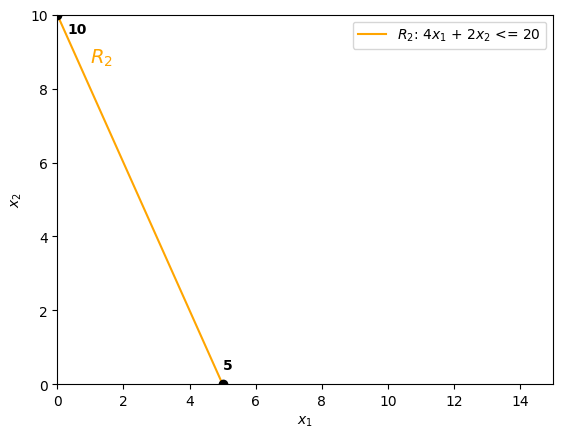

In [10]:
fig, ax = plt.subplots()

ax.set_xlim(0,15)
ax.set_ylim(0,10)
x1 = np.linspace(0, 15)

ax.plot(x1,  10-2*x1, label="$R_2$: 4$x_1$ + 2$x_2$ <= 20", color="orange")
ax.text(1, 8.7, '$R_2$', fontsize = 14, color="orange", fontweight="bold")

ax.plot(5, 0, "o", color="black")
ax.text(5, 0.4, '5', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 10, "o", color="black")
ax.text(0.3, 9.5, '10', fontsize = 10, color="black", fontweight="bold")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()

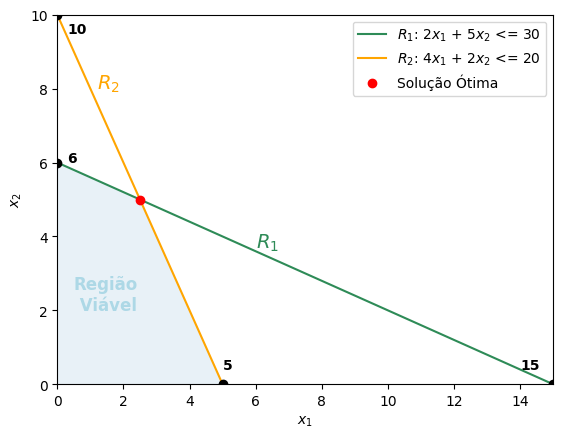

In [11]:
fig, ax = plt.subplots()

ax.set_xlim(0,15)
ax.set_ylim(0,10)
x1 = np.linspace(0, 15)

ax.plot(x1, 6-0.4*x1, label="$R_1$: 2$x_1$ + 5$x_2$ <= 30", color="seagreen")
ax.plot(x1,  10-2*x1, label="$R_2$: 4$x_1$ + 2$x_2$ <= 20", color="orange")

ax.text(1.2, 8, '$R_2$', fontsize = 14, color="orange", fontweight="bold")
ax.text(6, 3.7, '$R_1$', fontsize = 14, color="seagreen", fontweight="bold")
ax.text(0.5, 2, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")

ax.plot(5, 0, "o", color="black")
ax.text(5, 0.4, '5', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 10, "o", color="black")
ax.text(0.3, 9.5, '10', fontsize = 10, color="black", fontweight="bold")

ax.plot(15, 0, "o", color="black")
ax.text(14, 0.4, '15', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 6, "o", color="black")
ax.text(0.3, 6, '6', fontsize = 10, color="black", fontweight="bold")

ax.plot(2.5, 5, "o", label="Solução Ótima", color="red")
feasible_set = Polygon(np.array([[0, 0],[0, 6],[2.5, 5],[5, 0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()

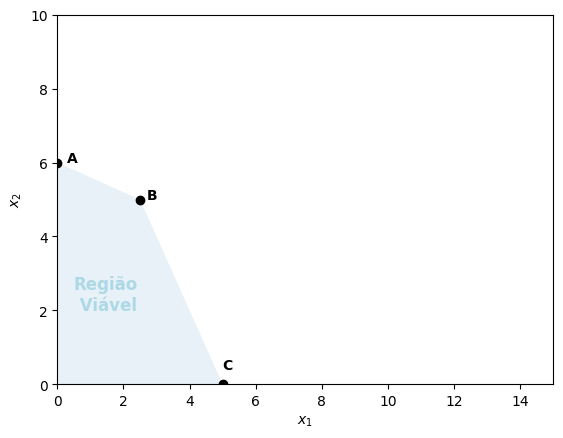

In [18]:
fig, ax = plt.subplots()

ax.set_xlim(0,15)
ax.set_ylim(0,10)
x1 = np.linspace(0, 15)

# ax.plot(x1, 6-0.4*x1, label="$R_1$: 2$x_1$ + 5$x_2$ <= 30", color="seagreen")
# ax.plot(x1,  10-2*x1, label="$R_2$: 4$x_1$ + 2$x_2$ <= 20", color="orange")

# ax.text(1.2, 8, '$R_2$', fontsize = 14, color="orange", fontweight="bold")
# ax.text(6, 3.7, '$R_1$', fontsize = 14, color="seagreen", fontweight="bold")
ax.text(0.5, 2, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")

ax.plot(5, 0, "o", color="black")
ax.text(5, 0.4, 'C', fontsize = 10, color="black", fontweight="bold")

ax.plot(0, 6, "o", color="black")
ax.text(0.3, 6, 'A', fontsize = 10, color="black", fontweight="bold")

ax.plot(2.5, 5, "o",color="black")
ax.text(2.7, 5, 'B', fontsize = 10, color="black", fontweight="bold")

feasible_set = Polygon(np.array([[0, 0],[0, 6],[2.5, 5],[5, 0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
# ax.legend()

plt.show()

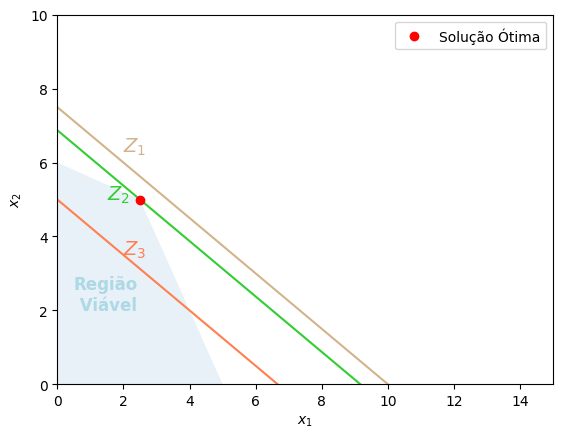

In [19]:
fig, ax = plt.subplots()

ax.set_xlim(0,15)
ax.set_ylim(0,10)
x1 = np.linspace(0, 15)


feasible_set = Polygon(np.array([[0, 0],[0, 6],[2.5, 5],[5, 0]]), alpha=0.1)
ax.add_patch(feasible_set)

ax.plot(x1, (30-3*x1)/4, linewidth=1.5, color="tan")
ax.text(2, 6.3, '$Z_1$', fontsize = 14, color="tan", fontweight="bold")

ax.plot(x1, (27.5-3*x1)/4, linewidth=1.5, color="limegreen")
ax.text(1.5, 5, '$Z_2$', fontsize = 14, color="limegreen", fontweight="bold")

ax.plot(x1, (20-3*x1)/4, linewidth=1.5, color="coral")
ax.text(2, 3.5, '$Z_3$', fontsize = 14, color="coral", fontweight="bold")
ax.text(0.5, 2, 'Região\n Viável', fontsize = 12, color="lightblue", fontweight="bold")

ax.plot(2.5, 5, "o", label="Solução Ótima", color="red")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

plt.show()